<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Pandas-Profiling" data-toc-modified-id="Pandas-Profiling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pandas Profiling</a></span></li><li><span><a href="#Sweetviz" data-toc-modified-id="Sweetviz-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sweetviz</a></span></li><li><span><a href="#Modelling:-Random-Forest" data-toc-modified-id="Modelling:-Random-Forest-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelling: Random Forest</a></span></li><li><span><a href="#Yellowbrick-Visualization" data-toc-modified-id="Yellowbrick-Visualization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Yellowbrick Visualization</a></span><ul class="toc-item"><li><span><a href="#Prediction-Error-vs-Truth" data-toc-modified-id="Prediction-Error-vs-Truth-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Prediction Error vs Truth</a></span></li></ul></li><li><span><a href="#Random-Forest-Confidence-Interval" data-toc-modified-id="Random-Forest-Confidence-Interval-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Random Forest Confidence Interval</a></span></li><li><span><a href="#Model-Explanation-Using-Lime" data-toc-modified-id="Model-Explanation-Using-Lime-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model Explanation Using Lime</a></span></li><li><span><a href="#Model-Intrepretation-using-ELI5" data-toc-modified-id="Model-Intrepretation-using-ELI5-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Intrepretation using ELI5</a></span></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Feature Importances</a></span><ul class="toc-item"><li><span><a href="#ELI5's-Permutation-Importance-on-the-same-features" data-toc-modified-id="ELI5's-Permutation-Importance-on-the-same-features-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>ELI5's Permutation Importance on the same features</a></span></li></ul></li><li><span><a href="#Feature-importance-as-a-box-plot" data-toc-modified-id="Feature-importance-as-a-box-plot-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Feature importance as a box plot</a></span></li><li><span><a href="#Weights-of-a-tree-in-a-small-forest" data-toc-modified-id="Weights-of-a-tree-in-a-small-forest-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Weights of a tree in a small forest</a></span></li><li><span><a href="#sklearn-Random-Forest-plot-tree-using-graphviz" data-toc-modified-id="sklearn-Random-Forest-plot-tree-using-graphviz-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>sklearn Random Forest plot tree using graphviz</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description
Data source: https://www.kaggle.com/harlfoxem/housesalesprediction

# Load the libraries

In [1]:
import time
time_start_notebook = time.time()

In [2]:
%%capture
import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install watermark

    # model evaluation
    !pip install shap
    !pip install eli5
    !pip install lime
    !pip install duecredit # forestci needs this
    !pip install forestci # fci.random_forest_error(model_rf, Xtrain,Xtest)
    !pip install dtreeviz # decision tree viz
    
    # update modules
    !pip install -U scikit-learn # we need restart
    import sklearn

    # update pandas profiling
    # profile = df.profile_report(style={'full_width':True})
    # profile.to_file(output_file="output.html")
    !pip install -U pandas-profiling # we need restart
    import pandas_profiling

    # Note: We need to restart kernel to use tqdm
    # from tqdm.notebook import trange, tqdm
    # tqdm.pandas()
    # out = df['A'].progress_apply(myfunc)
    !pip install -U tqdm

    # print
    print('Environment: Google Colaboratory.')

# NOTE: If we update modules in gcolab, we need to restart runtime.

In [66]:
# usual imports
import numpy as np
import pandas as pd


# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# modelling
import sklearn
from sklearn import ensemble

# mixed
import os
import time
import tqdm

# random state
SEED = 0
RNG = np.random.RandomState(SEED)

# ipython
import IPython
from IPython.display import display, HTML, Image, Markdown

# model eval
import shap
import lime
import eli5
import yellowbrick
import pandas_profiling
from pandas_profiling import ProfileReport
import dtreeviz
import forestci
import forestci as fci
import pydotplus
from eli5 import show_weights
from eli5 import show_prediction
import lime.lime_tabular

# versions
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Bhishan Poudel 2020-11-23 

CPython 3.7.9
IPython 7.19.0

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

seaborn          0.11.0
matplotlib       3.3.3
IPython          7.19.0
sklearn          0.23.2
yellowbrick      1.2
pandas_profiling 2.9.0
forestci         0.4.1
tqdm             4.53.0
shap             0.34.0
json             2.0.9
eli5             0.10.1
numpy            1.18.5
watermark        2.0.2
pandas           1.1.4



# Useful Functions

In [73]:
def show_methods(obj, ncols=4):
    lst = [i for i in dir(obj) if i[0]!='_' ]
    df = pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')
    return df

# Parameters

In [4]:
if ENV_COLAB:
    path_raw = 'https://raw.githubusercontent.com/bhishanpdl/Datasets/master/'
    proj = 'Projects/King_County_Seattle_House_Price_Kaggle/'
    data_path_parent = path_raw + proj
    data_path_train = data_path_parent + 'raw/train.csv'
    data_path_test = data_path_parent + 'raw/test.csv'

else:
    data_path_parent = '../data/'
    data_path_train = data_path_parent + 'raw/train.csv'
    data_path_test = data_path_parent + 'raw/test.csv'

target = 'price'
train_size = 0.8

print(data_path_train)

../data/raw/train.csv


# Load the Data

In [5]:
df_train = pd.read_csv(data_path_train)
df_test = pd.read_csv(data_path_test)
print(df_train.shape)
print(df_train.columns)

display(df_train.head(2).append(df_train.tail(2)))

(17290, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


id             date     price  bedrooms  bathrooms  \
0      2561340020  20140804T000000  325000.0         3       1.75   
1      8598200070  20141208T000000  278000.0         2       2.50   
17288  7174800760  20140725T000000  667000.0         5       2.00   
17289  9521100280  20140612T000000  480000.0         3       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1780     11096     1.0           0     0  ...      7   
1             1420      2229     2.0           0     0  ...      7   
17288         1900      5470     1.0           0     0  ...      7   
17289         1250      1103     3.0           0     2  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1210            570      1979             0    98074  47.6170   
1            1420              0      2004             0    98059  47.4871   
17288        1180            720      1930          1965    98105  47.6666   
17289        1250              0      2005             0    98103  47.6619   

          long  sqft_living15  sqft_lot15  
0     -122.051           1780       10640  
1     -122.165           1500        2230  
17288 -122.303           1300        3250  
17289 -122.352           1250        1188  

[4 rows x 21 columns]

In [6]:
df_train.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
cols_drop = ['id','date']

df_train = df_train.drop(cols_drop,axis=1)
df_test = df_test.drop(cols_drop,axis=1)

In [8]:
df_Xtrain = df_train.drop(target,axis=1)
df_Xtest  = df_test.drop(target, axis=1)

Xtrain = np.array(df_Xtrain)
Xtest  = np.array(df_Xtest)

ser_ytrain = df_train[target]
ser_ytest  = df_test[target]

ytrain = np.array(ser_ytrain).flatten()
ytest  = np.array(ser_ytest).flatten()

# Pandas Profiling
This takes long time, run this using script.

In [11]:
%%writefile get_report_pandas_profiling.py
#!/usr/bin/env python
import pandas as pd
import pandas_profiling

def get_report_pandas_profiling(ifile,ofile):
    # Data
    df = pd.read_csv(ifile)
    profile = pandas_profiling.ProfileReport(df)
    profile.to_file(ofile)

if __name__ == '__main__':
    ifile = '../data/raw/kc_house_data.csv'
    ofile = '../reports/report_pandas_profiling.html'
    get_sweetviz_report(ifile,ofile)

Writing get_report_pandas_profiling.py


# Sweetviz

This takes long time, use separate script to run it once.

In [12]:
%%writefile get_report_sweetviz.py
#!/usr/bin/env python
import pandas as pd
import sweetviz

def get_report_sweetviz(ifile,ofile):
    # config
    sweetviz.config_parser.read_string("[Layout]\nshow_logo=0")

    # Data
    df = pd.read_csv(ifile)
    print(f'shape: {df.shape}')

    my_report = sweetviz.analyze([df,'Full data'])
    my_report.show_html(ofile)

if __name__ == '__main__':
    ifile = '../data/raw/kc_house_data.csv'
    ofile = '../reports/report_sweetviz.html'
    get_report_sweetvis(ifile,ofile)

Overwriting get_report_sweetviz.py


# Modelling: Random Forest

In [13]:
model = sklearn.ensemble.RandomForestRegressor(n_estimators=100,
                                             random_state=SEED)

model.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=100)

In [14]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(ytrain, model.predict(Xtrain))
mse_test = mean_squared_error(ytest, model.predict(Xtest))

print(f'Random Forest mean-squared error on train set: {mse_train:.5f}')
print(f'Random Forest mean-squared error on test  set: {mse_test:.5f}')

Random Forest mean-squared error on train set: 2390088635.38711
Random Forest mean-squared error on test  set: 15884522785.79567


# Yellowbrick Visualization

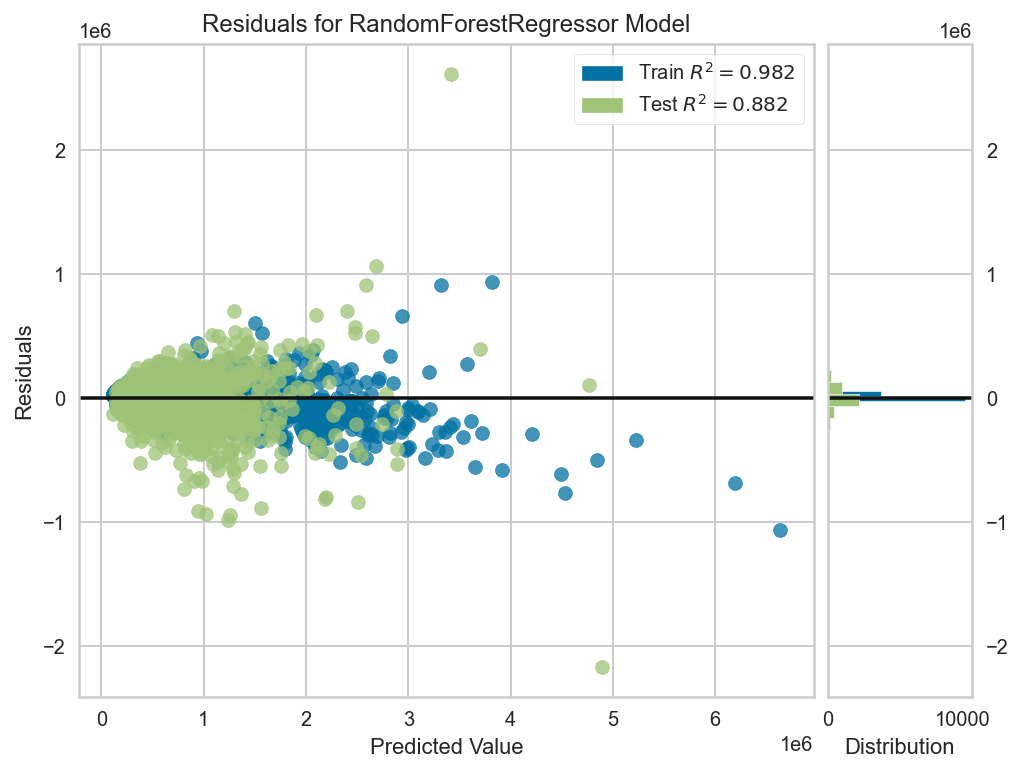

In [15]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

# resuduals vs predicted values
fig, ax = plt.subplots(figsize=(8,6)); 
visualizer = ResidualsPlot(model, ax=ax)

visualizer.fit(Xtrain, ytrain)  
visualizer.score(Xtest, ytest) 


g = visualizer.poof()

In [16]:
ser_test_resids = pd.Series(model.predict(Xtest) - ytest)

ax = ser_test_resids.plot(kind="hist", bins=10,
                          title="Residuals on Predicted", color='g', alpha=1);
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


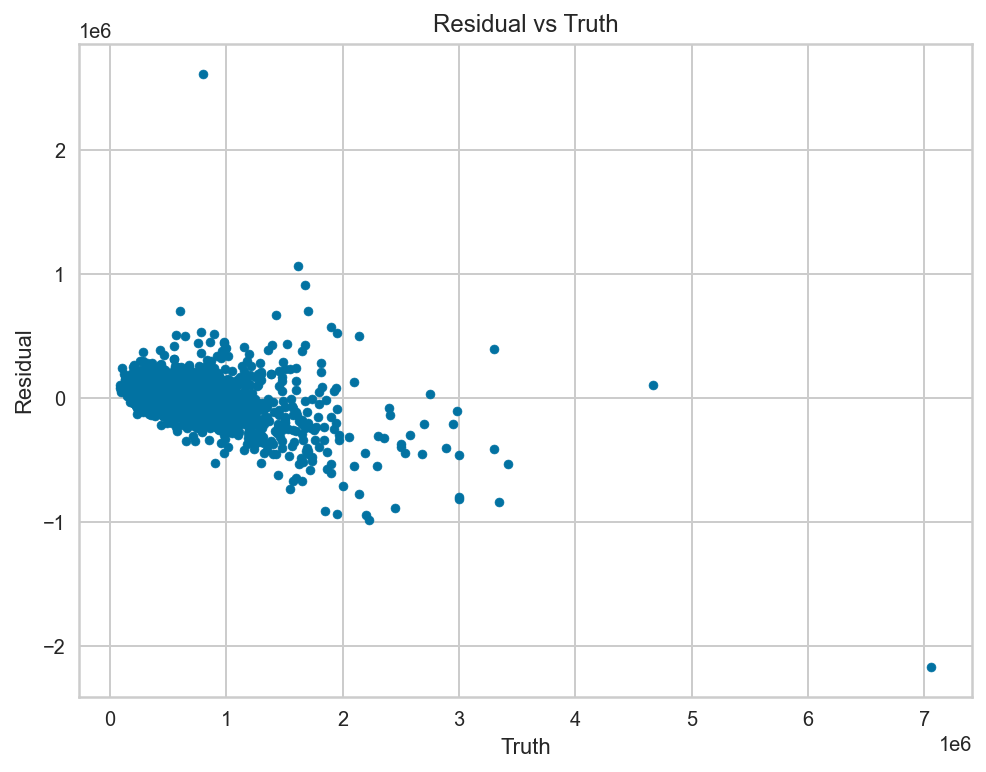

In [17]:
# residuals vs true values

dfx = pd.DataFrame({'Residual': ser_test_resids.to_numpy(), 'Truth': ytest})
fig, ax = plt.subplots(figsize=(8,6)); 

dfx.plot(kind="scatter", x='Truth', y='Residual', ax=ax,
         title="Residual vs Truth");

## Prediction Error vs Truth

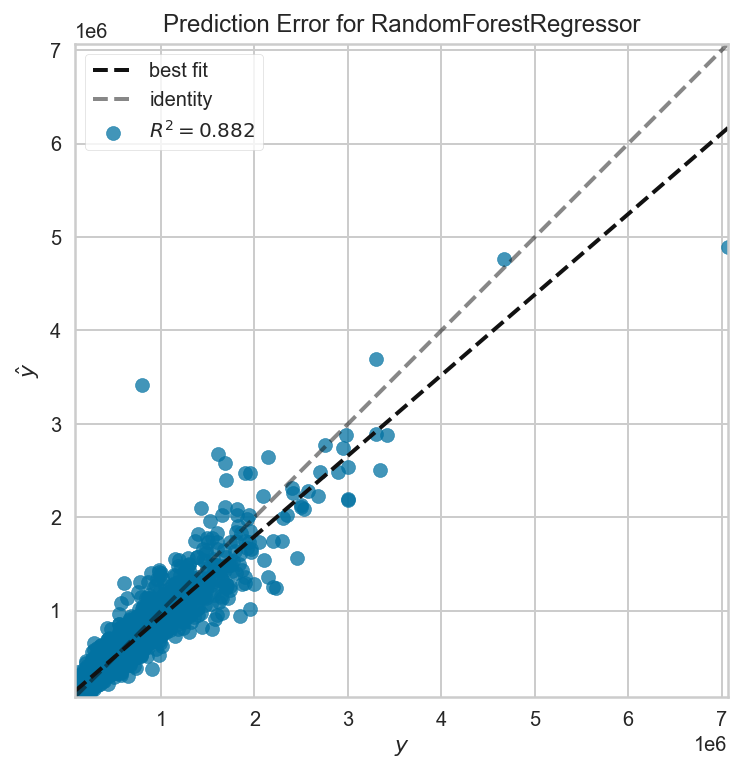

In [18]:
# if predictions are close to truth, we get 45 deg line
fig, ax = plt.subplots(figsize=(8,6)); 

visualizer = PredictionError(model, ax=ax)

visualizer.fit(Xtrain, ytrain)
visualizer.score(Xtest, ytest)
g = visualizer.poof()

# Random Forest Confidence Interval

References:
- http://contrib.scikit-learn.org/forest-confidence-interval/auto_examples/plot_mpg.html#sphx-glr-auto-examples-plot-mpg-py

In [19]:
import forestci as fci

overflow encountered in exp
invalid value encountered in true_divide


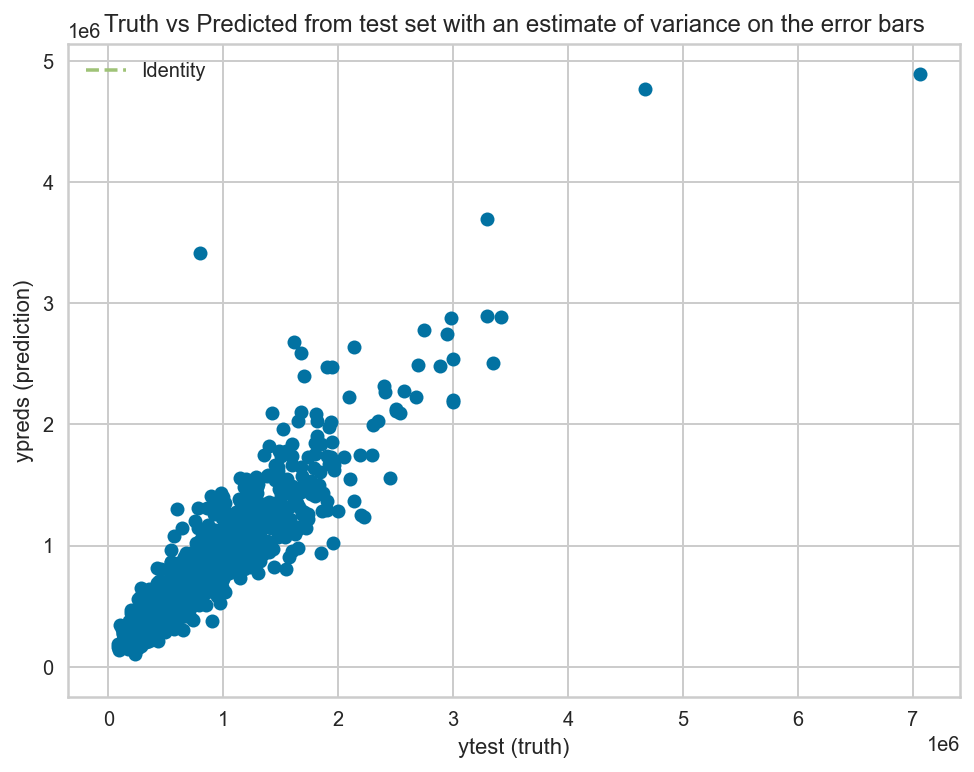

In [20]:
V_IJ_unbiased = fci.random_forest_error(model, Xtrain, Xtest)

ypreds = model.predict(Xtest)

fig, ax = plt.subplots(figsize=(8,6)); 
ax.errorbar(ytest, ypreds, yerr=np.sqrt(V_IJ_unbiased), fmt='o');

ax.set(title="Truth vs Predicted from test set with an estimate of variance on the error bars",
       xlabel="ytest (truth)",
       ylabel="ypreds (prediction)");
plt.plot([0, 50], [0, 50], '--', label="Identity");
plt.legend();

In [22]:
# If we build estimators on bootstrap samples of the original training set and
# test them all on the same test set, we can see
# if certain parts of the regression range are more variable. 
# This might suggest that our original training data isn't very good
# at properly defining these parts of the regression range.

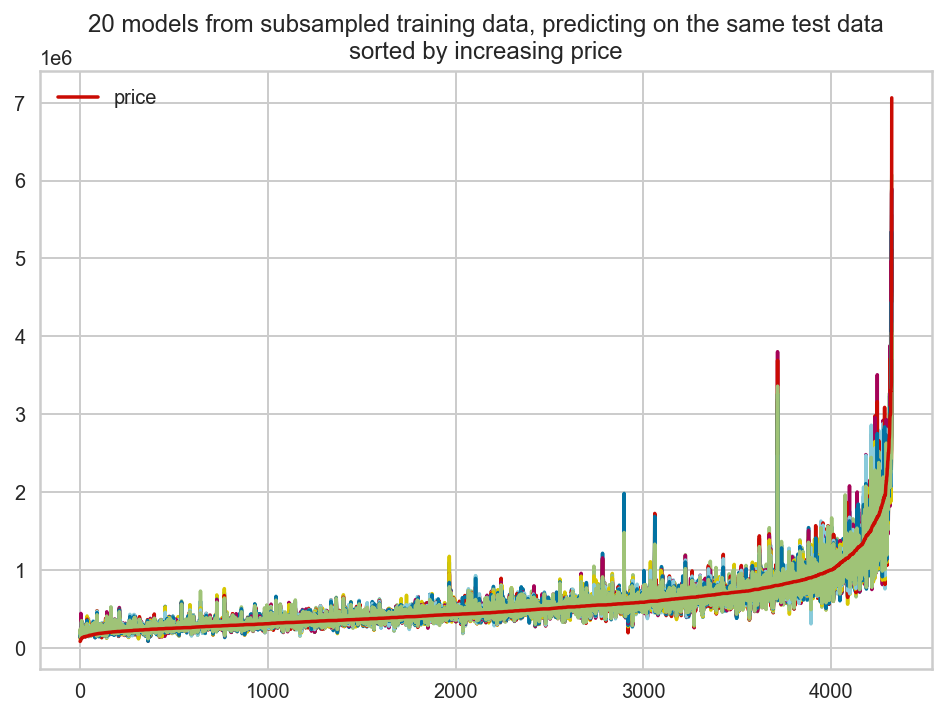

In [23]:
%%time

# fixed test set, subsampled training set
# need to identify where the most variance exists
n_items = Xtrain.shape[0]
N_BOOTSTRAP_MODELS = 20

ser_ypreds_subsample = pd.DataFrame({'price': ytest}) 

import copy
model_subsample = copy.copy(model)

for n in range(N_BOOTSTRAP_MODELS):
    train_mask = np.random.uniform(0, n_items, int(n_items * 0.9)).astype(np.int_)
    df_Xtrain_masked = df_Xtrain.iloc[train_mask]
    ser_ytrain_masked = ser_ytrain.iloc[train_mask]
    
    model_subsample.fit(df_Xtrain_masked, ser_ytrain_masked)
    
    mse_train = mean_squared_error(ser_ytrain_masked, model_subsample.predict(df_Xtrain_masked))
    ypreds = model_subsample.predict(Xtest)
    ser_ypreds_subsample[f'prediction_{n}'] = ypreds
    mse_test = mean_squared_error(ytest, ypreds)


fig, ax = plt.subplots()
ser_ypreds_subsample = ser_ypreds_subsample.sort_values(target).reset_index(drop=True)
ser_ypreds_subsample.drop([target], axis=1).plot(ax=ax, legend=False);
ser_ypreds_subsample[target].plot(ax=ax, label=target, legend=True)
ax.set(title="{} models from subsampled training data,\
 predicting on the same test data\nsorted by increasing price".format(N_BOOTSTRAP_MODELS));

plt.show()

In [24]:
ser_ypreds_subsample.head()
# we do not have much variance

price   prediction_0  prediction_1  prediction_2  prediction_3  \
0   82500.0  142149.200000      139748.0     198321.43     132443.50   
1   84000.0  219204.200000      199347.3     222482.40     194468.20   
2   92000.0  150097.840000      158602.0     169153.64     153096.52   
3   95000.0  153051.733333      172824.3     161808.25     173089.63   
4  105500.0  357380.750000      141086.5     418092.00     326018.50   

    prediction_4  prediction_5   prediction_6   prediction_7   prediction_8  \
0  113340.500000     151062.00  192610.600000  160423.733333  210922.600000   
1  163114.583333     200623.21  204826.233333  218428.776667  219307.516667   
2  134874.000000     164636.18  153371.130000  193290.770000  155654.910000   
3  150396.500000     149936.00  151005.500000  152251.930000  177271.133333   
4  138257.150000     388501.00  167553.000000  367720.500000  400104.450000   

   ...  prediction_10  prediction_11  prediction_12  prediction_13  \
0  ...      150935.50  164147.983333  149175.771429      178948.90   
1  ...      170443.50  197598.816667  173947.057143      197591.30   
2  ...      136652.63  154650.000000  163976.500000      157817.25   
3  ...      173601.66  135316.250000  143232.944444      163906.95   
4  ...      320318.50  181887.500000  174659.500000      335607.50   

   prediction_14  prediction_15  prediction_16  prediction_17  prediction_18  \
0  168335.733333  182367.700000  150591.083333      168500.00  157423.800000   
1  194979.900000  207897.000000  188478.261905      174044.50  164710.050000   
2  143193.670000  150760.784286  152514.630000      140313.25  133347.750000   
3  164266.000000  151310.500000  159131.250000      156467.68  169188.464286   
4  344823.000000  348528.400000  167737.000000      159588.80  149971.920000   

   prediction_19  
0      193492.25  
1      240378.10  
2      146495.13  
3      181192.74  
4      170711.65  

[5 rows x 21 columns]

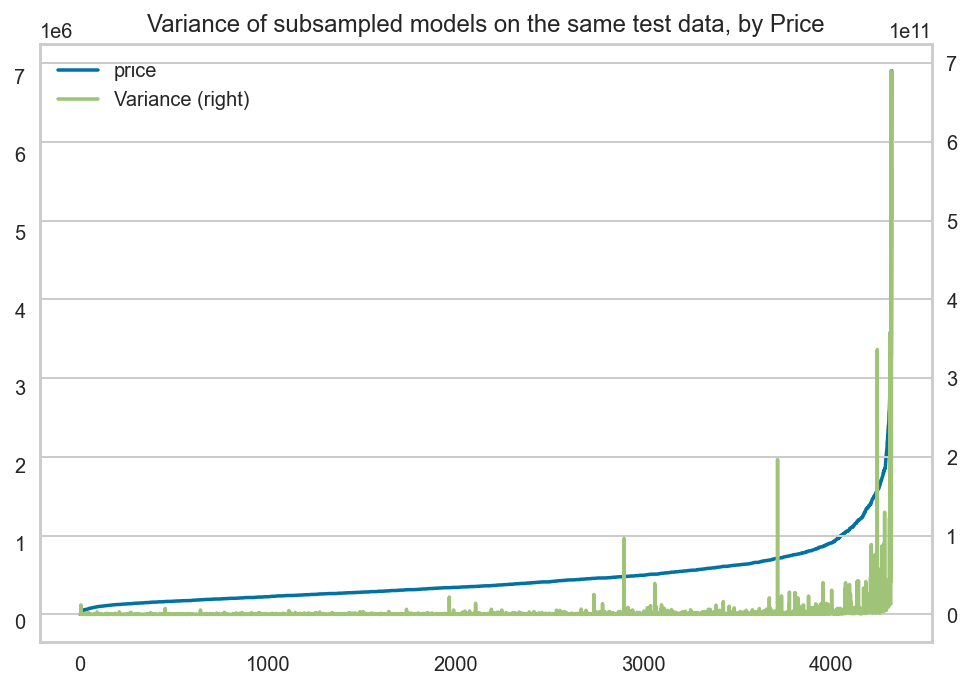

In [25]:
fig, ax = plt.subplots()
ser_ypreds_subsample[target].plot(ax=ax, secondary_y=False,
                                  label=target, legend=True)


ser_ypreds_subsample.drop([target], axis=1).var(axis=1).plot(
    ax=ax, label="Variance", legend=True, secondary_y=True);


ax.set(title="Variance of subsampled models on the same test data, by Price");

# Model Explanation Using Lime

In [28]:
example_to_explain_idx = 14
example_to_explain = df_Xtest.iloc[example_to_explain_idx]
example_to_explain_true_answer = ser_ytest.iloc[example_to_explain_idx]
feature_names = df_Xtrain.columns.tolist()

print(f"Explaining the {example_to_explain_idx}th row from the testing set")

Explaining the 14th row from the testing set


In [29]:
print("The answer we're looking for is: ", example_to_explain_true_answer)
print("The predicted answer is:", float(model.predict(example_to_explain.values.reshape(-1, 1).T)))
print("The input data X is: ")

The answer we're looking for is:  405000.0
The predicted answer is: 427318.5
The input data X is: 


In [30]:
pd.DataFrame(example_to_explain)

14
bedrooms           3.0000
bathrooms          1.5000
sqft_living     1330.0000
sqft_lot       12500.0000
floors             1.0000
waterfront         0.0000
view               0.0000
condition          3.0000
grade              7.0000
sqft_above      1330.0000
sqft_basement      0.0000
yr_built        1966.0000
yr_renovated       0.0000
zipcode        98027.0000
lat               47.5263
long            -122.0510
sqft_living15   2310.0000
sqft_lot15     12500.0000

In [31]:
df_Xtrain.apply(pd.Series.nunique).loc[lambda x: x <10]

floors        6
waterfront    2
view          5
condition     5
dtype: int64

In [32]:
categorical_features = df_Xtrain.apply(pd.Series.nunique).loc[lambda x: x <10].index.to_list()
categorical_features

['floors', 'waterfront', 'view', 'condition']

In [33]:
categorical_features_idx = [df_Xtrain.columns.get_loc(x)
                            for x in categorical_features]
categorical_features_idx

[4, 5, 6, 7]

In [34]:
feature_names = df_Xtrain.columns.to_list()
categorical_features = categorical_features_idx
explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain, 
                    feature_names=feature_names, 
                    class_names=['price'], 
                    categorical_features=categorical_features_idx, 
                    verbose=True, 
                    mode='regression')

# Lime Uses perturbed data neighborhood_data and neighborhood_labels
# Intercept is the generated linear model's intercept
# Prediction_local is the predicted output from the linear model
# Right is the predicted value from the explained regressor (not LIME's linear model)

In [35]:
exp = explainer.explain_instance(example_to_explain, model.predict, num_features=10)

Intercept 935578.71671716
Prediction_local [322517.60288523]
Right: 427318.5


In [36]:
exp.show_in_notebook(show_table=True)

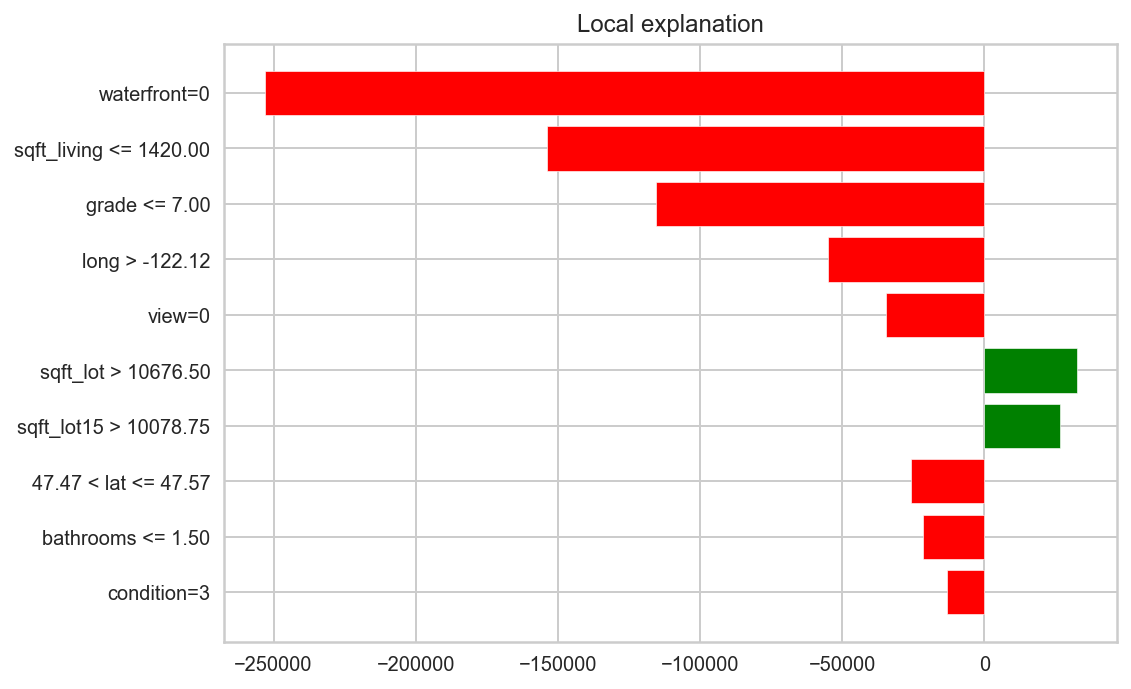

In [37]:
exp.as_pyplot_figure()
# note that the double-plot is a bug: https://github.com/marcotcr/lime/issues/89

In [38]:
lst = exp.as_list()
lst

[('waterfront=0', -253007.61538697372),
 ('sqft_living <= 1420.00', -153878.48247339186),
 ('grade <= 7.00', -115284.93850252031),
 ('long > -122.12', -55098.24984048135),
 ('view=0', -34502.57503882127),
 ('sqft_lot > 10676.50', 32499.361683630483),
 ('sqft_lot15 > 10078.75', 26676.358222492046),
 ('47.47 < lat <= 47.57', -25924.353978643514),
 ('bathrooms <= 1.50', -21432.820345771208),
 ('condition=3', -13107.79817144811)]

In [39]:
pd.DataFrame(lst)

0              1
0            waterfront=0 -253007.615387
1  sqft_living <= 1420.00 -153878.482473
2           grade <= 7.00 -115284.938503
3          long > -122.12  -55098.249840
4                  view=0  -34502.575039
5     sqft_lot > 10676.50   32499.361684
6   sqft_lot15 > 10078.75   26676.358222
7    47.47 < lat <= 47.57  -25924.353979
8       bathrooms <= 1.50  -21432.820346
9             condition=3  -13107.798171

# Model Intrepretation using ELI5

In [40]:
import eli5
from eli5 import show_weights
from eli5 import show_prediction

In [41]:
print("BIAS is the mean of the training data (i.e. a guess prior to using any features):", ytrain.mean())

BIAS is the mean of the training data (i.e. a guess prior to using any features): 539524.7533834586


In [42]:
model

RandomForestRegressor(random_state=100)

In [43]:
feature_names = df_Xtrain.columns.to_list()

show_prediction(model, 
                example_to_explain,
                feature_names=feature_names, 
                show_feature_values=True)

# Feature Importances

In [44]:
df_imp = pd.DataFrame({'feature_importances_': model.feature_importances_}, index=feature_names)
df_imp.sort_values(by="feature_importances_", ascending=False).head(10).round(4)

feature_importances_
grade                        0.3294
sqft_living                  0.2477
lat                          0.1572
long                         0.0698
waterfront                   0.0336
sqft_living15                0.0307
yr_built                     0.0283
sqft_above                   0.0239
zipcode                      0.0148
sqft_lot15                   0.0139

In [45]:
# using eli5 importance visualizer
# Note that the +/- value assumes a Gaussian and the boxplot below shows that this isn't true

In [46]:
show_weights(model, feature_names=feature_names)

## ELI5's Permutation Importance on the same features

In [47]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model).fit(Xtest, ytest)
eli5.show_weights(perm, feature_names=feature_names)

# Feature importance as a box plot

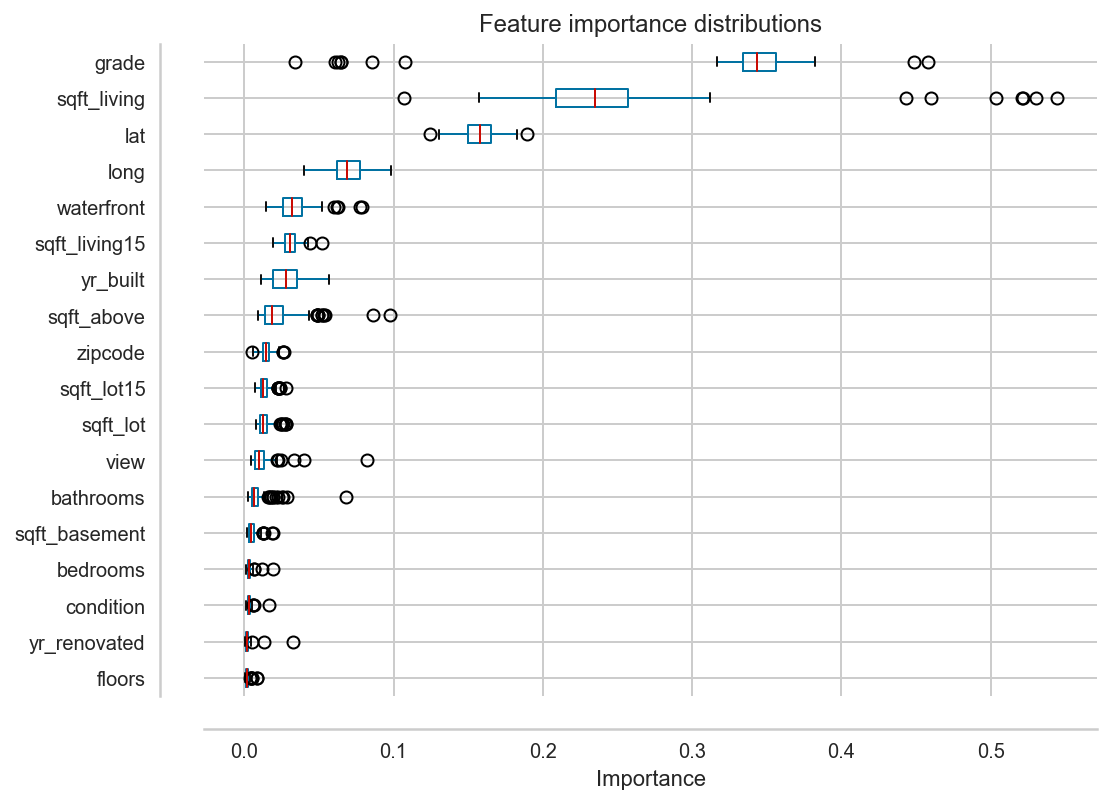

In [48]:
feature_names = df_Xtrain.columns.to_list()

df_imp = pd.DataFrame()

for est_idx, est_tree in enumerate(model.estimators_):
    df_imp["tree_{}".format(est_idx)] = est_tree.feature_importances_

df_imp.index = feature_names
df_imp = df_imp.T

sorted_index = df_imp.mean(axis=0).sort_values().index

fig, ax = plt.subplots(figsize=(8,6)); 
df_imp[sorted_index].plot(kind="box", vert=False, ax=ax, title="Feature importance distributions");
ax.set_xlabel("Importance")

# remove right/top border to make things slightly neater
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# visual tidy-up to make left axis small values slightly easier to read
# offset left and bottom axis
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))

In [49]:
fig, ax = plt.subplots(figsize=(8,6)); 
sns.stripplot(data=df_imp[sorted_index[::-1]], jitter=0.05, orient="h", ax=ax, edgecolor="k", linewidth=1);
sns.boxplot(data=df_imp[sorted_index[::-1]], orient="h", ax=ax);
ax.set_title("Feature importance distributions");
ax.set_xlabel("Importance");

# Weights of a tree in a small forest

In [50]:
show_weights(model, feature_names=feature_names, show="description")

In [51]:
est_depth_3 = sklearn.ensemble.RandomForestRegressor(n_estimators=10,
                                             max_depth=3,
                                             random_state=0)

print("Sizes for train {}, test {}".format(Xtrain.shape, Xtest.shape))
est_depth_3.fit(Xtrain, ytrain)


est_tree0 = est_depth_3.estimators_[0]

Sizes for train (17290, 18), test (4323, 18)


In [52]:
show_weights(est_tree0, feature_names=feature_names)

In [53]:
est_tree1 = est_depth_3.estimators_[1]
show_weights(est_tree1, feature_names=feature_names)

# sklearn Random Forest plot tree using graphviz

In [54]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from subprocess import call

model = RandomForestRegressor(n_estimators=10,random_state=SEED)
model.fit(Xtrain,ytrain)
last_decision_tree = model.estimators_[-1]

export_graphviz(last_decision_tree, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target,
                rounded = True,
                proportion = False, 
                precision = 2,
                filled = True)

# NOTE: The image is too small, its useless

# Export as dot file
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [60]:
# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [62]:
import pydotplus

# Create DOT data
dot_data = sklearn.tree.export_graphviz(
    last_decision_tree,
    out_file=None, 
    feature_names=feature_names,  
    class_names=target)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

# NOTE: The image is too BIG, its useless

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0580735 to fit



In [63]:
# # Create PDF
# graph.write_pdf("forest.pdf")

# # Create PNG
# graph.write_png("forest.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0580735 to fit



True